In [1]:
%env LS_COLORS=None
!tree --charset ascii dogcat/my_train

env: LS_COLORS=None
dogcat/my_train
|-- cat
|   |-- cat.1.jpg
|   |-- cat.2.jpg
|   |-- cat.3.jpg
|   |-- cat.4.jpg
|   |-- cat.5.jpg
|   |-- cat.6.jpg
|   |-- cat.7.jpg
|   `-- cat.8.jpg
`-- dog
    |-- dog.1.jpg
    |-- dog.2.jpg
    |-- dog.3.jpg
    |-- dog.4.jpg
    |-- dog.5.jpg
    |-- dog.6.jpg
    |-- dog.7.jpg
    `-- dog.8.jpg

2 directories, 16 files


In [2]:
import torch as t
from torch.utils import data
import os 
from PIL import Image
import numpy as np
class DogCat(data.Dataset):
    def __init__(self,root):
        imgs=os.listdir(root)    #图片名
        self.imgs=[os.path.join(root,img) for img in imgs]  
        #图片绝对路径（这里的绝对路径不是从盘符开始的那个绝对路径，是相对于前面的图片名来说的
    def __getitem__(self,index):
        img_path=self.imgs[index]            #第index个图片的绝对路径
        
        label=1 if 'dog' in img_path.split('/')[-1] else 0 #以/为分割符 取最后一项   
        #a="you are dog"   则"dog“ in a为True  ,包含即可
        pil_img=Image.open(img_path)
        array=np.asarray(pil_img)
        data=t.from_numpy(array)
        return data,label
    def __len__(self):
        return len(self.imgs)

In [3]:
dataset=DogCat('./dogcat/my_train/dog')
img,label=dataset[0]
img,label  

(tensor([[[235, 225, 213],
          [167, 153, 140],
          [136, 118,  98],
          ...,
          [131, 103,  82],
          [126,  98,  77],
          [125,  97,  76]],
 
         [[248, 234, 221],
          [172, 155, 139],
          [131, 109,  88],
          ...,
          [115,  84,  64],
          [111,  80,  60],
          [110,  79,  59]],
 
         [[247, 230, 212],
          [169, 148, 127],
          [129, 101,  77],
          ...,
          [ 85,  54,  33],
          [ 83,  52,  31],
          [ 84,  53,  32]],
 
         ...,
 
         [[255, 255, 244],
          [254, 255, 241],
          [250, 251, 237],
          ...,
          [239, 240, 226],
          [238, 239, 225],
          [238, 239, 225]],
 
         [[255, 255, 244],
          [255, 255, 242],
          [252, 253, 239],
          ...,
          [245, 246, 232],
          [244, 245, 231],
          [244, 245, 231]],
 
         [[255, 255, 244],
          [255, 255, 243],
          [254, 255, 241],
   

In [4]:
for img,label in dataset:
    print(img.size(),img.float().mean(),label)

torch.Size([499, 327, 3]) tensor(133.5602) 1
torch.Size([199, 187, 3]) tensor(143.0630) 1
torch.Size([375, 499, 3]) tensor(129.4572) 1
torch.Size([287, 300, 3]) tensor(117.9481) 1
torch.Size([376, 499, 3]) tensor(100.6830) 1
torch.Size([488, 499, 3]) tensor(118.2518) 1
torch.Size([264, 299, 3]) tensor(118.2256) 1
torch.Size([500, 469, 3]) tensor(110.9992) 1


In [6]:
from torchvision import transforms as T
transform=T.Compose([
    T.Resize(224),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])
])
class DogCat(data.Dataset):
    def __init__(self,root,transforms=None):
        imgs=os.listdir(root)
        self.imgs=[os.path.join(root,img) for img in imgs]
        self.transforms=transforms
    def __getitem__(self,index):
        img_path=self.imgs[index]
        label=1 if 'dog' in img_path.split('/')[-1] else 0
        pil_img=Image.open(img_path)
        if self.transforms:
            data=self.transforms(pil_img)
        return data,label
    def __len__(self):
        return len(self.imgs)
dataset=DogCat('./dogcat/my_train/dog',transforms=transform)
img,label=dataset[0]
img,label  

(tensor([[[ 0.7020,  0.3020,  0.0353,  ..., -0.6078, -0.6549, -0.5294],
          [ 0.6706,  0.2392,  0.0196,  ..., -0.6314, -0.6392, -0.4510],
          [ 0.7098,  0.2784,  0.0431,  ..., -0.6471, -0.6314, -0.3647],
          ...,
          [ 0.9765,  0.8902,  0.8275,  ...,  0.7098,  0.7176,  0.7333],
          [ 0.9765,  0.8902,  0.8196,  ...,  0.6863,  0.7098,  0.7255],
          [ 0.9765,  0.8824,  0.8118,  ...,  0.6157,  0.6314,  0.6627]],
 
         [[ 0.6941,  0.3020,  0.0431,  ..., -0.7176, -0.7490, -0.6000],
          [ 0.6706,  0.2392,  0.0196,  ..., -0.7412, -0.7490, -0.5529],
          [ 0.6863,  0.2627,  0.0353,  ..., -0.7412, -0.7412, -0.4824],
          ...,
          [ 0.9843,  0.8980,  0.8353,  ...,  0.6941,  0.7020,  0.7176],
          [ 0.9843,  0.8980,  0.8275,  ...,  0.6706,  0.6941,  0.7098],
          [ 0.9765,  0.8902,  0.8196,  ...,  0.6000,  0.6157,  0.6471]],
 
         [[ 0.6078,  0.2000, -0.0902,  ..., -0.9137, -0.9608, -0.8275],
          [ 0.5922,  0.1451,

In [7]:
for img,label in dataset:
    print(img.shape,label)

torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1


In [ ]:
!tree --charset ASCII dogcat/my_train/

In [8]:
from torchvision.datasets import ImageFolder
dataset=ImageFolder('dogcat/my_train/')
dataset.class_to_idx

{'cat': 0, 'dog': 1}

In [9]:
dataset.imgs

[('dogcat/my_train/cat/cat.1.jpg', 0),
 ('dogcat/my_train/cat/cat.2.jpg', 0),
 ('dogcat/my_train/cat/cat.3.jpg', 0),
 ('dogcat/my_train/cat/cat.4.jpg', 0),
 ('dogcat/my_train/cat/cat.5.jpg', 0),
 ('dogcat/my_train/cat/cat.6.jpg', 0),
 ('dogcat/my_train/cat/cat.7.jpg', 0),
 ('dogcat/my_train/cat/cat.8.jpg', 0),
 ('dogcat/my_train/dog/dog.1.jpg', 1),
 ('dogcat/my_train/dog/dog.2.jpg', 1),
 ('dogcat/my_train/dog/dog.3.jpg', 1),
 ('dogcat/my_train/dog/dog.4.jpg', 1),
 ('dogcat/my_train/dog/dog.5.jpg', 1),
 ('dogcat/my_train/dog/dog.6.jpg', 1),
 ('dogcat/my_train/dog/dog.7.jpg', 1),
 ('dogcat/my_train/dog/dog.8.jpg', 1)]

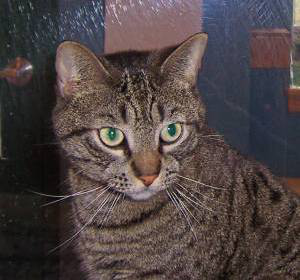

In [10]:
dataset[0][0]

In [11]:
dataset[0][0].size

(300, 280)

In [12]:
dataset[0][1]

0

In [13]:
#若加上transform
transform=T.Compose([
    T.RandomSizedCrop(224),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean=[.4,.4,.4],std=[.2,.2,.2])
])
dataset=ImageFolder('dogcat/my_train/',transform=transform)

/home/n/anaconda3/envs/pytorch131/lib/python3.7/site-packages/torchvision/transforms/transforms.py:703: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  warnings.warn("The use of the transforms.RandomSizedCrop transform is deprecated, " +


In [14]:
dataset[0][0]

tensor([[[-1.1765, -0.9804, -1.0392,  ..., -0.2353,  0.8039,  1.1765],
         [-1.1961, -1.1569, -1.1765,  ..., -0.2157,  0.8039,  1.0980],
         [-1.0980, -1.2353, -1.2745,  ..., -0.1961,  0.8824,  1.1176],
         ...,
         [-1.5490, -1.6863, -1.6863,  ..., -0.7059, -0.4314, -0.2157],
         [-1.5882, -1.5882, -1.6275,  ..., -0.5490, -0.2745, -0.0196],
         [-1.7451, -1.5686, -1.5882,  ..., -0.4510, -0.1765,  0.0196]],

        [[-1.1176, -0.9020, -0.9608,  ..., -0.1373,  0.8431,  1.1176],
         [-1.1373, -1.0784, -1.0980,  ..., -0.1176,  0.8431,  1.0588],
         [-1.0392, -1.1569, -1.1961,  ..., -0.0784,  0.9216,  1.0588],
         ...,
         [-1.6471, -1.7647, -1.7647,  ..., -1.0392, -0.7647, -0.5294],
         [-1.6863, -1.6863, -1.7255,  ..., -0.8824, -0.5686, -0.2941],
         [-1.8431, -1.6667, -1.6863,  ..., -0.7451, -0.4706, -0.2353]],

        [[-1.0000, -0.8431, -0.9020,  ..., -0.0392,  0.7647,  0.9020],
         [-1.0196, -1.0196, -1.0392,  ..., -0

In [15]:
dataset[0][0].size()

torch.Size([3, 224, 224])

In [16]:
dataset[0][1]

0

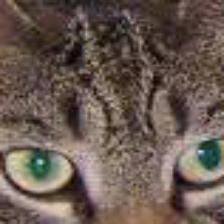

In [17]:
to_img=T.ToPILImage()
to_img(dataset[0][0]*0.2+0.4)

In [18]:
from torch.utils.data import  DataLoader
dataloader=DataLoader(dataset,batch_size=3,shuffle=True,num_workers=0,drop_last=False)
dataiter=iter(dataloader)
imgs,labels=next(dataiter)
imgs.size()

torch.Size([3, 3, 224, 224])

In [19]:
####异常处理  以后再写
class NewDogCat(DogCat):
    def __getitem__(self,index):
        

SyntaxError: unexpected EOF while parsing (<ipython-input-19-82062907e869>, line 1)